<a href="https://colab.research.google.com/github/subhra01/Python_Project_DS/blob/main/House_Price_Prediction_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: TECHNOHACKS EDUTECH.
(Internship Program 2023, Batch-7)

**Author**: Subhradyuti Jana (Data science intern)


*  ** Problem Statement**: Use a dataset that includes information about
housing prices and features like square footage, number of bedrooms, etc. to train a model that can predict the price of a new house




We import our libraries and dataset and then we see the head of the data to know how the data looks like and use describe function to see the percentile’s and other key statistics.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [4]:
data = pd.read_csv("/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,114700150,20141114T000000,236000.0,3,1.75,1560,10919,1.0,0,0,...,7,1560,0,1975,0,98023,47.2917,-122.366,1730.0,10919.0
9596,472000620,20140502T000000,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380.0,4750.0
9597,5491200210,20140820T000000,350000.0,3,1.00,2010,6000,1.0,0,0,...,7,1210,800,1967,0,98108,47.5515,-122.298,2460.0,6000.0
9598,7973202712,20150324T000000,130000.0,2,1.00,780,5300,1.0,0,0,...,6,780,0,1941,0,98146,47.5130,-122.354,780.0,5300.0


**Reading Dataset**

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


**Knowing more about the dataset**

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.600000e+03,9.600000e+03,9600.000000,9600.000000,9600.000000,9.600000e+03,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9599.000000,9599.000000,9599.000000
mean,4.556650e+09,5.337390e+05,3.361146,2.061745,2052.376667,1.610479e+04,1.430521,0.008125,0.240104,3.445208,7.593438,1748.303229,304.073438,1967.246458,91.921458,98078.050104,47.559870,-122.214800,1973.162621,13394.509428
std,2.863457e+09,3.801030e+05,0.914339,0.766914,912.743934,4.495113e+04,0.511424,0.089777,0.770697,0.665803,1.169649,811.455793,451.619012,27.999417,418.449395,53.989866,0.140154,0.139283,672.394603,26373.312028
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.117205e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.462275,-122.326000,1490.000000,5422.500000
50%,3.905030e+09,4.450000e+05,3.000000,2.000000,1890.000000,7.910000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.572800,-122.231000,1830.000000,7848.000000
75%,7.276350e+09,6.390000e+05,4.000000,2.500000,2500.000000,1.119425e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.127000,2340.000000,10382.000000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000


**Which is the most common house (Bedroom wise) ?**

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

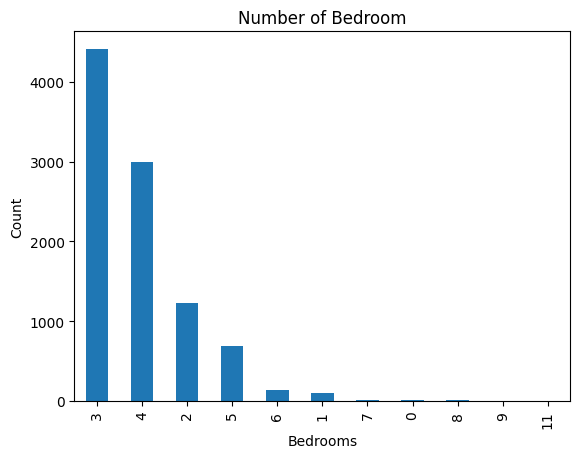

In [7]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

**Visualizing the location of the houses based on latitude and longitude.**

<Figure size 2000x1000 with 0 Axes>

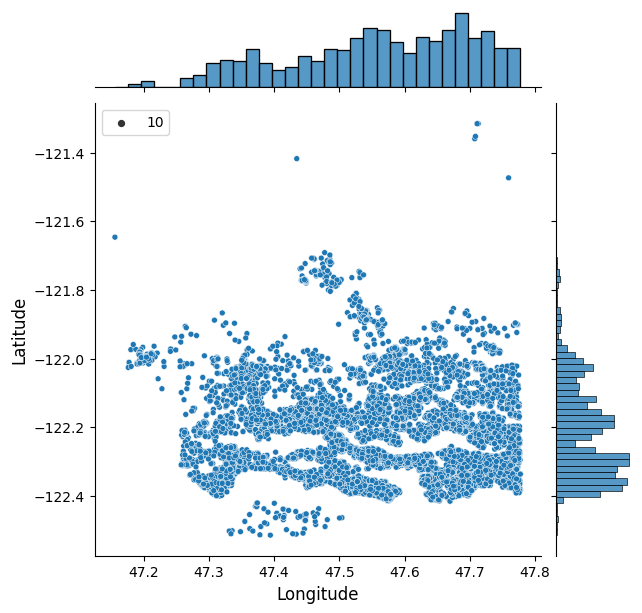

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [8]:
plt.figure(figsize=(20,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()
sns.despine


**How common factors are affecting the price of the houses **

Text(0.5, 1.0, 'Price vs Square Feet')

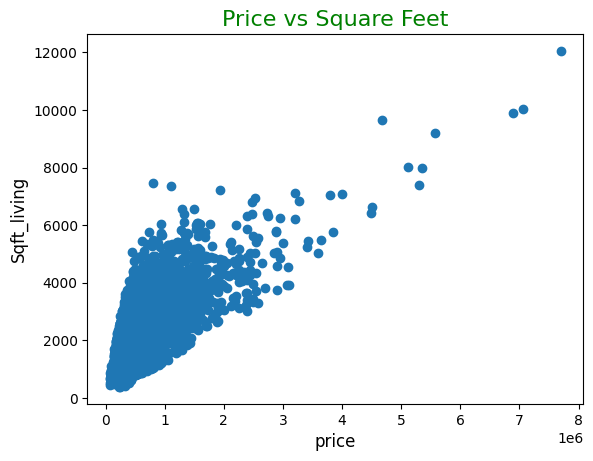

In [9]:
plt.scatter(data.price, data.sqft_living)
plt.xlabel("price", fontsize=12)
plt.ylabel("Sqft_living", fontsize=12)
plt.title("Price vs Square Feet", color='green', fontsize=16)

Text(0.5, 1.0, 'Price vs Location of the Area')

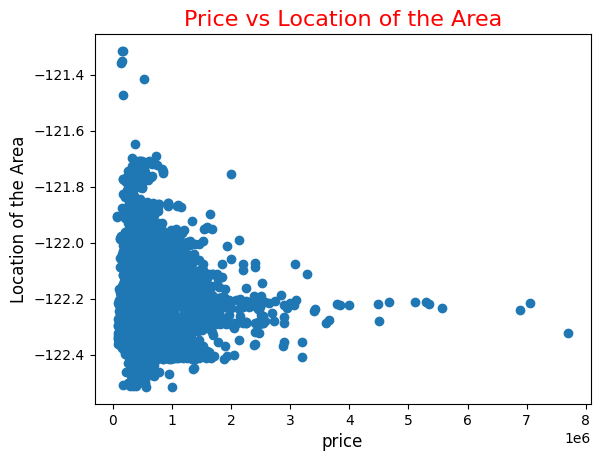

In [10]:
plt.scatter(data.price, data.long)
plt.xlabel("price", fontsize=12)
plt.ylabel("Location of the Area", fontsize=12)
plt.title("Price vs Location of the Area", color='red', fontsize=16)

Text(0.5, 1.0, 'Latitude vs Price')

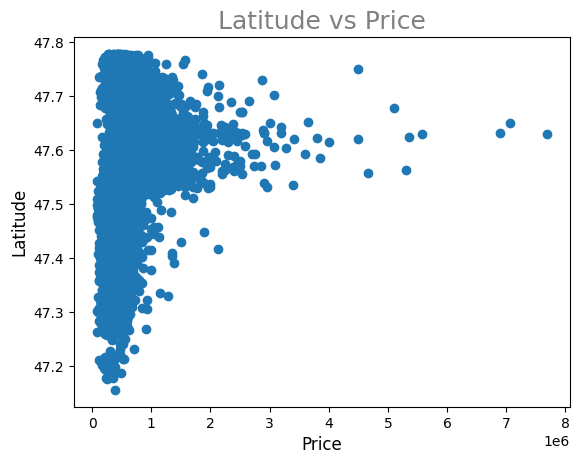

In [11]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("Latitude vs Price", color='grey', fontsize=18)

**We can see more factors affecting the price**

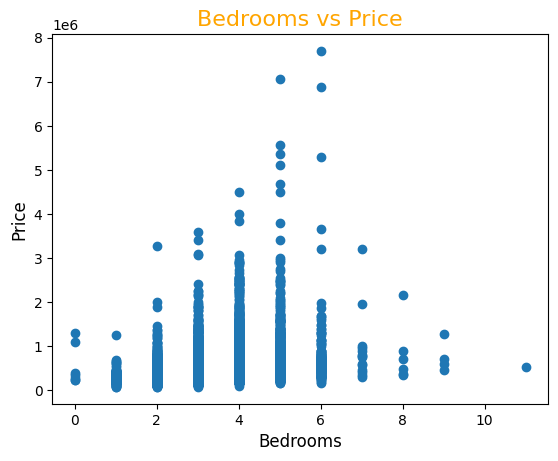

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [12]:
plt.scatter(data.bedrooms, data.price)
plt.xlabel("Bedrooms", size=12)
plt.ylabel("Price", size=12)
plt.title("Bedrooms vs Price", size=16, color='orange')
plt.show()
sns.despine

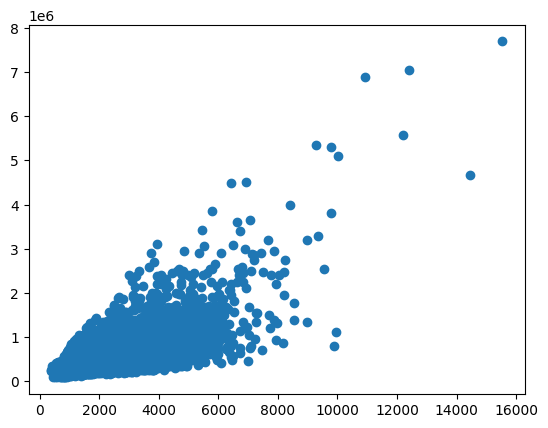

In [13]:
plt.scatter((data['sqft_living']+data['sqft_basement']), data['price'])

Text(0.5, 1.0, 'Waterfront vs Price(0= no waterfront)')

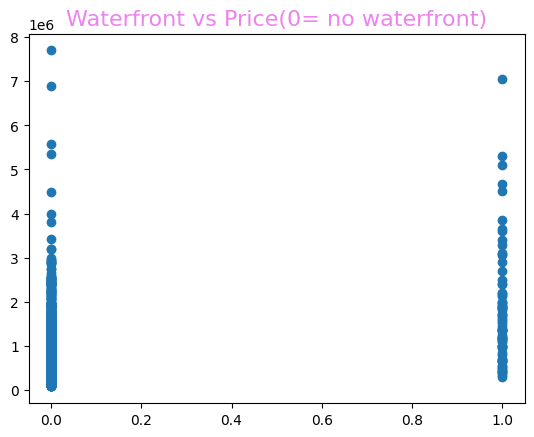

In [14]:
plt.scatter(data.waterfront, data.price)
plt.title("Waterfront vs Price(0= no waterfront)", size=16, color='violet')

In [15]:
train1 = data.drop(['id', 'price'], axis=1)

In [16]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


<Axes: >

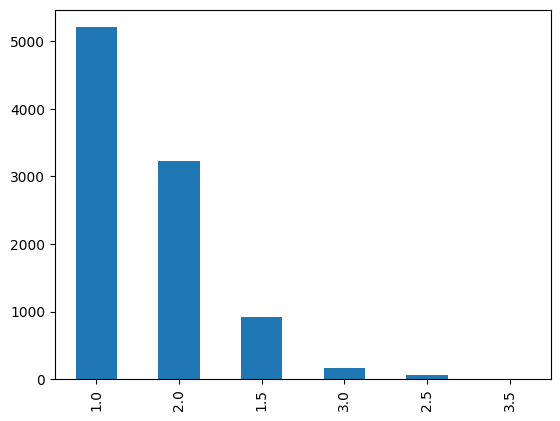

In [17]:
data.floors.value_counts().plot(kind='bar')

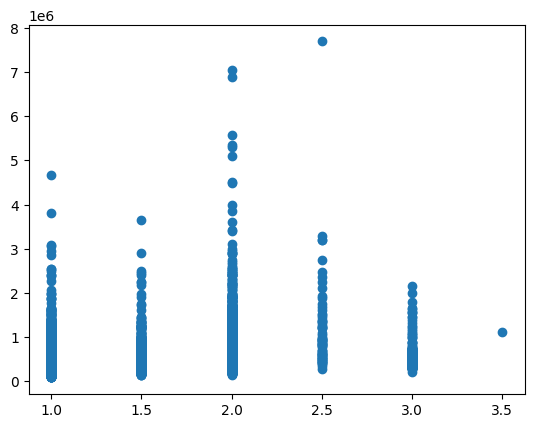

In [18]:
plt.scatter(data.floors, data.price)
plt.show()

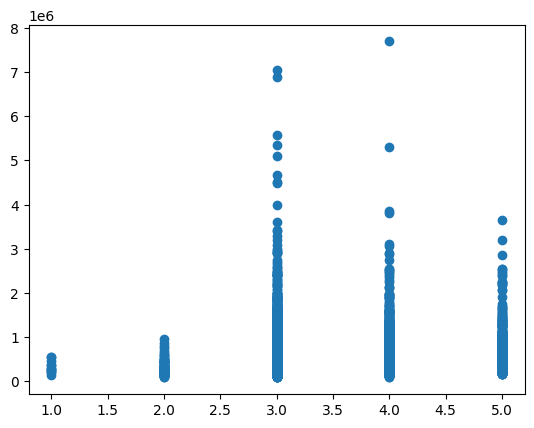

In [19]:
plt.scatter(data.condition, data.price)

Text(0.5, 1.0, 'Which is the Pricey location by zipcode?')

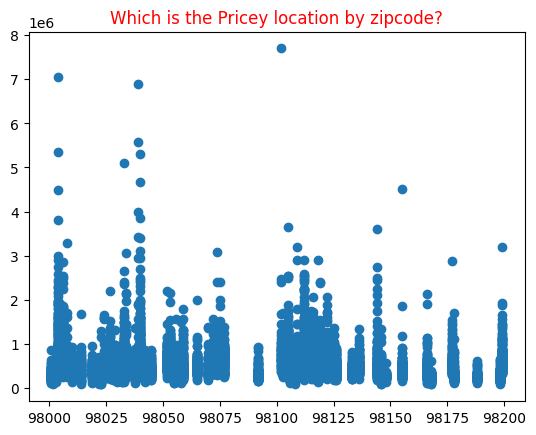

In [20]:
plt.scatter(data.zipcode, data.price)
plt.title("Which is the Pricey location by zipcode?", color='red')

**Linear Regression **

In [21]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression()

In [40]:
labels = data['price']
conv_dates=[1 if values == 2014 else 0 for values in data.date]
data['date']= conv_dates
train1 = data.drop(['id', 'price'], axis=1)

In [48]:
from sklearn.model_selection import train_test_split

In [65]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)


In [66]:
reg.fit(x_train,y_train)

LinearRegression()

In [72]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Create an instance of HistGradientBoostingRegressor
reg = HistGradientBoostingRegressor()

# Fit the model and predict as usual
reg.fit(x_train, y_train)
score = reg.score(x_test, y_test)
score


0.8613866850223724

In [73]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth = 5, min_samples_split=2, learning_rate=0.1, loss = 'squared_error')

In [75]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
import pandas as pd  # Import pandas library

# Create an instance of GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='squared_error')

# Fit the model on the training data
clf.fit(x_train, y_train)

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the test data
imputer.fit(x_train)
x_test_imputed = imputer.transform(x_test)

# Create a DataFrame with feature names
x_test_imputed_df = pd.DataFrame(x_test_imputed, columns=x_train.columns)

# Calculate the score on the imputed test data
score1 = clf.score(x_test_imputed_df, y_test)
score1


0.8978395205873558

In [84]:
params= {
    'n_estimators': 400
    }
t_sc = np.zeros((params['n_estimators']), dtype=np.float64)


In [85]:
y_pred = reg.predict(x_test)

In [93]:
for i, y_pred in enumerate(clf.staged_predict(x_test_imputed)):
    t_sc[i] = clf.loss_(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


In [90]:
testsc = np.arange((params['n_estimators']))+1

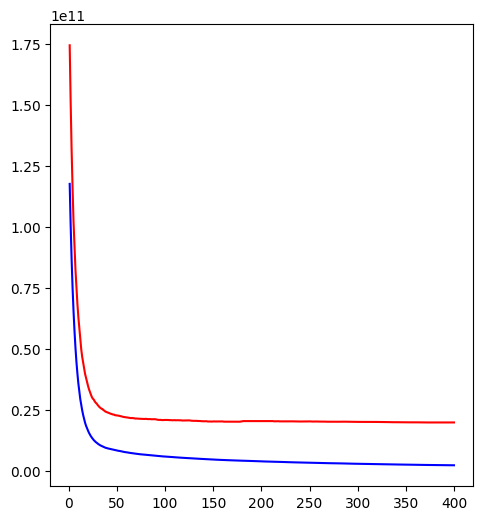

In [91]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')